In [5]:
import pandas as pd
import sys
from sklearn.pipeline import Pipeline
from itertools import product
import scipy.stats as ss
import string
import numpy as np
import os


In [6]:
os.path.abspath('..')
sys.path.append(os.path.abspath('..'))


In [7]:
games = pd.read_csv('../data/games.csv', index_col='game_id')
train = pd.read_csv('../data/train.csv', index_col='game_id')
turns = pd.read_csv('../data/turns.csv', index_col='game_id')

In [8]:
import functions
import transformers
import importlib

importlib.reload(functions)
importlib.reload(transformers)
from transformers.columns_setter_transformer import ColumnsSetterTransformer
from transformers.extract_set_column_transformer import ExtractSetColumnsTransformer
from transformers.name_dropper_transformer import NameDropperTransformer
from transformers.select_transformer import SelectTransformer
from transformers.select_rows_transformer import SelectRowsTransformer
from transformers.series_from_group_transformer import SeriesFromGroupTransformer
from transformers.map_set_transformer import MapSetTransformer




from functions.bot_extractor import BotExtarctor
from functions.is_bot_extractor import IsBotExtarctor
importlib.reload(functions.is_bot_extractor)
importlib.reload(functions.bot_extractor)
importlib.reload(transformers.columns_setter_transformer)
importlib.reload(transformers.extract_set_column_transformer)
importlib.reload(transformers.name_dropper_transformer)
importlib.reload(transformers.select_transformer)
importlib.reload(transformers.select_rows_transformer)
importlib.reload(transformers.series_from_group_transformer)
importlib.reload(transformers.map_set_transformer)





<module 'transformers.map_set_transformer' from 'c:\\Users\\guyv2\\OneDrive\\שולחן העבודה\\hafifa\\scrabble\\transformers\\map_set_transformer.py'>

In [9]:
names = ['BetterBot', 'STEEBot', 'HastyBot']
bots = BotExtarctor(names)(train)
is_player = ~IsBotExtarctor(names)(train)


In [10]:
games

,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
game_id,,,,,,,,,,,
1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
2,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418
3,BetterBot,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262
4,BetterBot,regular,RESIGNED,0,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141
5,STEEBot,regular,STANDARD,0,2022-09-06 04:31:36,NWL20,1200,0,CASUAL,1,642.688722
...,...,...,...,...,...,...,...,...,...,...,...
72769,browndav,blitz,STANDARD,0,2022-09-07 13:24:13,CSW21,180,0,RATED,1,218.043751
72770,HastyBot,regular,TIME,0,2022-09-04 00:13:24,CSW21,3600,0,RATED,1,3662.659287
72771,HastyBot,regular,STANDARD,0,2022-09-19 03:28:44,ECWL,900,0,CASUAL,10,236.133634


In [11]:
train_pipe = (Pipeline([('bot_names', ColumnsSetterTransformer({'bot_name': BotExtarctor(names),})),
                   ('players_selection', SelectTransformer(is_player)),
                   ('set_bot_training', ColumnsSetterTransformer({'bot_rating': train[~is_player]['rating']})),
                   ('name_dropper', NameDropperTransformer(['nickname']))
                   ]))

games_pipe = (Pipeline([('extract_first', ColumnsSetterTransformer({'is_bot_first': IsBotExtarctor(names, name_col='first')})),
                        ('drop_first', NameDropperTransformer('first'))
                       ]))

new_train = train_pipe.transform(train)
new_games = games_pipe.transform(games).merge(new_train, left_index=True, right_index=True)
new_games

,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,is_bot_first,score,rating,bot_name,bot_rating
game_id,,,,,,,,,,,,,,,
1,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,True,429,1500,BetterBot,1637
3,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262,True,440,1811,BetterBot,2071
4,regular,RESIGNED,0,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141,True,119,1473,BetterBot,1936
5,regular,STANDARD,0,2022-09-06 04:31:36,NWL20,1200,0,CASUAL,1,642.688722,True,325,1500,STEEBot,1844
6,regular,STANDARD,0,2022-08-21 14:56:35,CSW21,900,0,RATED,1,426.950541,False,378,2029,STEEBot,2143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72767,regular,TIME,0,2022-09-05 04:35:56,CSW21,3600,0,CASUAL,1,3669.988413,True,340,1395,BetterBot,1952
72770,regular,TIME,0,2022-09-04 00:13:24,CSW21,3600,0,RATED,1,3662.659287,True,97,1332,HastyBot,2237
72771,regular,STANDARD,0,2022-09-19 03:28:44,ECWL,900,0,CASUAL,10,236.133634,True,390,1500,HastyBot,1614


In [12]:
new_games.corr(numeric_only=True)['rating']

winner                   0.103753
initial_time_seconds     0.163808
increment_seconds        0.001256
max_overtime_minutes    -0.406451
game_duration_seconds    0.141911
is_bot_first            -0.002695
score                    0.334759
rating                   1.000000
bot_rating               0.673723
Name: rating, dtype: float64

In [13]:
new_games.dtypes

time_control_name         object
game_end_reason           object
winner                     int64
created_at                object
lexicon                   object
initial_time_seconds       int64
increment_seconds          int64
rating_mode               object
max_overtime_minutes       int64
game_duration_seconds    float64
is_bot_first                bool
score                      int64
rating                     int64
bot_name                  object
bot_rating                 int64
dtype: object

In [14]:
cats = ['winner', 'time_control_name', 'game_end_reason', 'lexicon', 'rating_mode', 'is_bot_first',
        'bot_name', 'initial_time_seconds', 'increment_seconds', 'max_overtime_minutes']
numerical = ['game_duration_seconds', 'score', 'bot_rating', 'rating']
cats_games = new_games[cats]

In [15]:
cat_var_prod = list(product(cats, cats, repeat = 1))
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            cats_games[i[0]], cats_games[i[1]])))[1]))
result

[('winner', 'time_control_name', 1.2183491435029153e-37),
 ('winner', 'game_end_reason', 0.0),
 ('winner', 'lexicon', 6.627313034668363e-114),
 ('winner', 'rating_mode', 0.015501744792469227),
 ('winner', 'is_bot_first', 6.942186603822927e-103),
 ('winner', 'bot_name', 1.2473995446228315e-28),
 ('winner', 'initial_time_seconds', 1.1182843460263926e-142),
 ('winner', 'increment_seconds', 3.010906662132513e-18),
 ('winner', 'max_overtime_minutes', 3.893958779562284e-88),
 ('time_control_name', 'winner', 1.2183491435029153e-37),
 ('time_control_name', 'game_end_reason', 8.658814800535514e-194),
 ('time_control_name', 'lexicon', 4.660373649149619e-303),
 ('time_control_name', 'rating_mode', 0.0),
 ('time_control_name', 'is_bot_first', 0.8574891903242577),
 ('time_control_name', 'bot_name', 0.0),
 ('time_control_name', 'initial_time_seconds', 0.0),
 ('time_control_name', 'increment_seconds', 2.875508659888193e-225),
 ('time_control_name', 'max_overtime_minutes', 0.0),
 ('game_end_reason', '

In [16]:
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 'coeff'])
chi_test_output.pivot(index='var1', columns='var2', values='coeff')


var2,bot_name,game_end_reason,increment_seconds,initial_time_seconds,is_bot_first,lexicon,max_overtime_minutes,rating_mode,time_control_name,winner
var1,,,,,,,,,,
bot_name,NaN,1.505179e-37,3.830144e-163,0.000000e+00,6.870210e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.247400e-28
game_end_reason,1.505179e-37,NaN,1.497955e-25,0.000000e+00,3.619799e-04,1.771364e-114,1.875329e-125,1.801290e-28,8.658815e-194,0.000000e+00
increment_seconds,3.830144e-163,1.497955e-25,NaN,0.000000e+00,8.894407e-01,4.233277e-74,0.000000e+00,5.844789e-57,2.875509e-225,3.010907e-18
initial_time_seconds,0.000000e+00,0.000000e+00,0.000000e+00,NaN,9.999886e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.118284e-142
is_bot_first,6.870210e-01,3.619799e-04,8.894407e-01,9.999886e-01,NaN,5.848548e-01,9.516777e-01,9.918082e-01,8.574892e-01,6.942187e-103
lexicon,0.000000e+00,1.771364e-114,4.233277e-74,0.000000e+00,5.848548e-01,NaN,0.000000e+00,0.000000e+00,4.660374e-303,6.627313e-114
max_overtime_minutes,0.000000e+00,1.875329e-125,0.000000e+00,0.000000e+00,9.516777e-01,0.000000e+00,NaN,0.000000e+00,0.000000e+00,3.893959e-88
rating_mode,0.000000e+00,1.801290e-28,5.844789e-57,0.000000e+00,9.918082e-01,0.000000e+00,0.000000e+00,NaN,0.000000e+00,1.550174e-02
time_control_name,0.000000e+00,8.658815e-194,2.875509e-225,0.000000e+00,8.574892e-01,4.660374e-303,0.000000e+00,0.000000e+00,NaN,1.218349e-37


In [17]:
check = 'game_end_reason'
new_games[[check, 'winner']].groupby([check]).sum() / new_games[[check, 'winner']].groupby([check]).count()

,winner
game_end_reason,
CONSECUTIVE_ZEROES,0.437158
RESIGNED,0.000000
STANDARD,0.375477
TIME,0.000000


In [18]:
new_games['rating'].std()

229.66244146755957

In [26]:
new_games.groupby('lexicon').size()

lexicon
CSW21     30480
ECWL       6583
NSWL20        4
NWL20     13343
dtype: int64

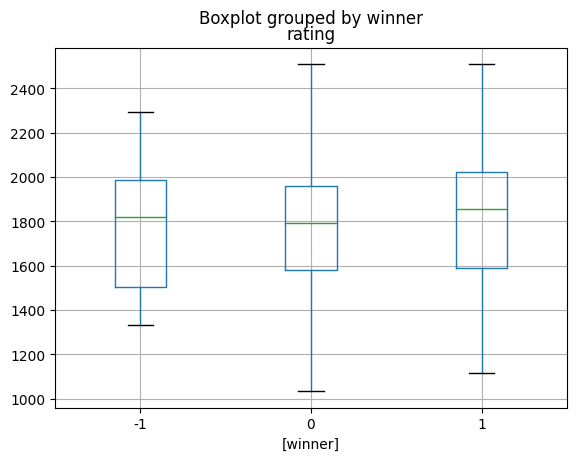

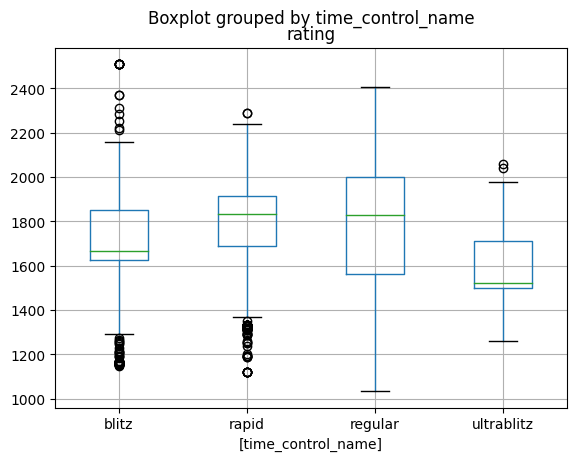

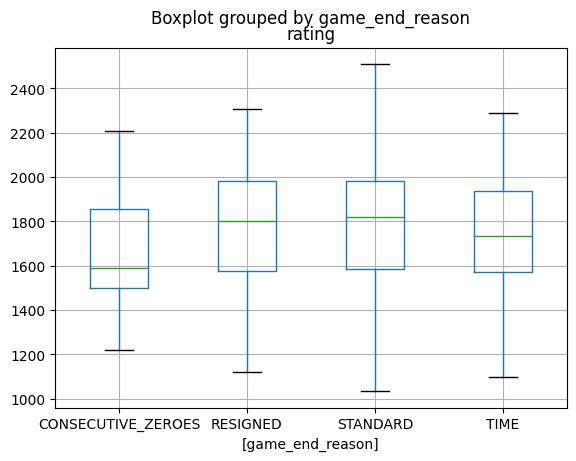

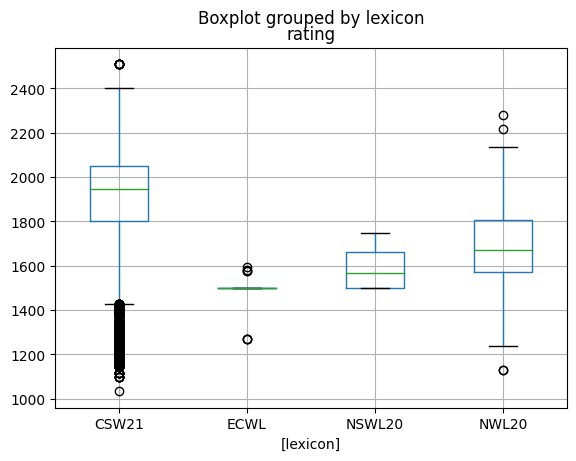

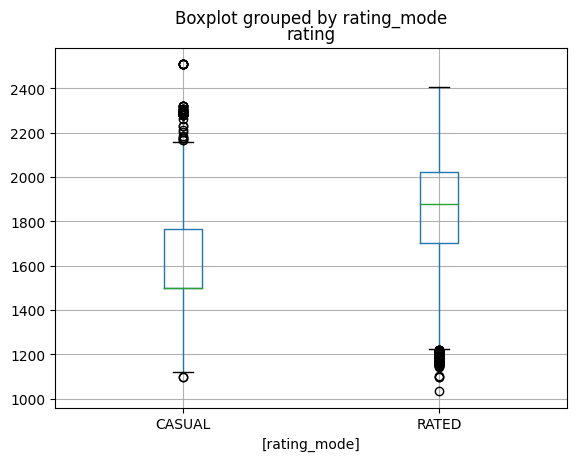

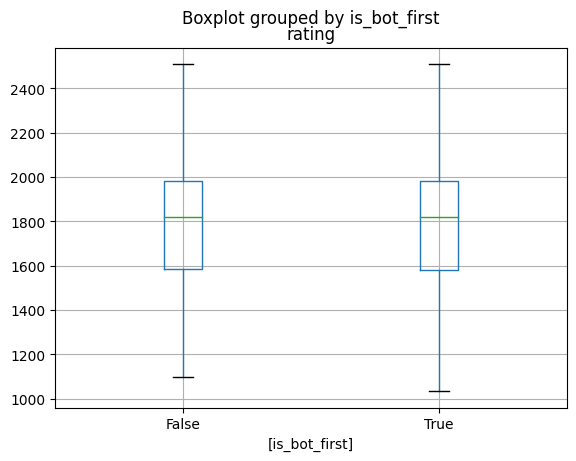

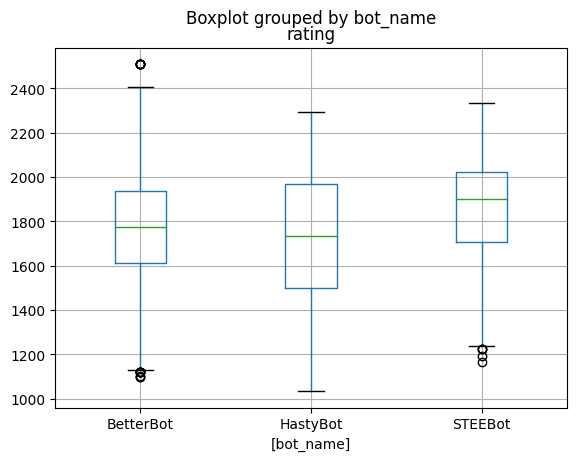

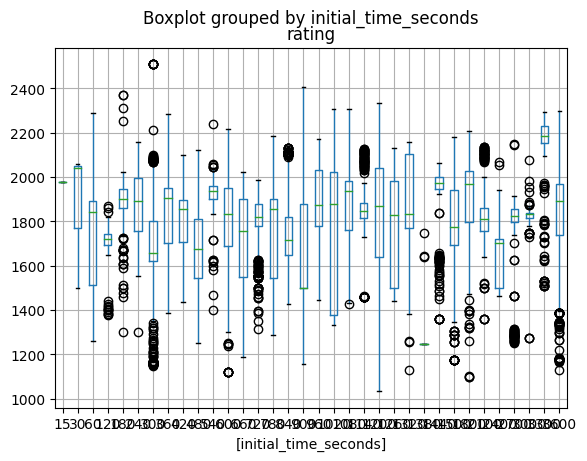

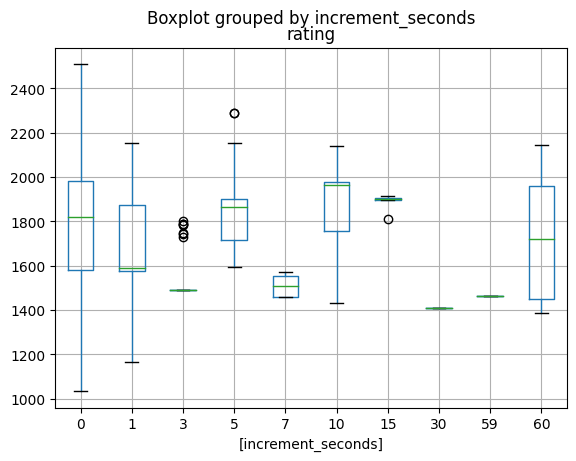

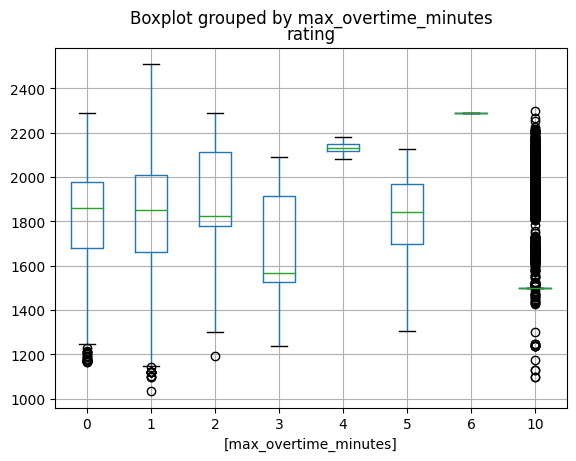

In [19]:
for check in cats:
    new_games[[check, 'rating']].boxplot(by=check)

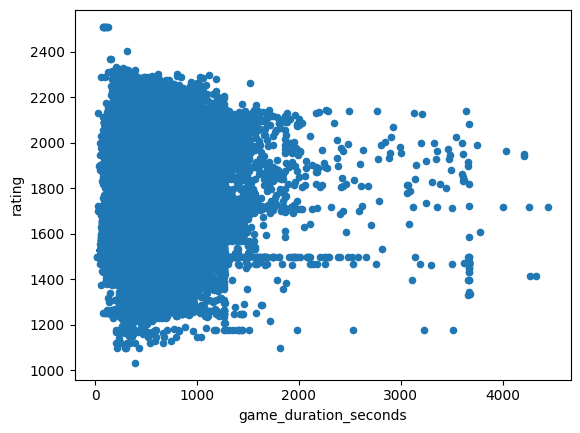

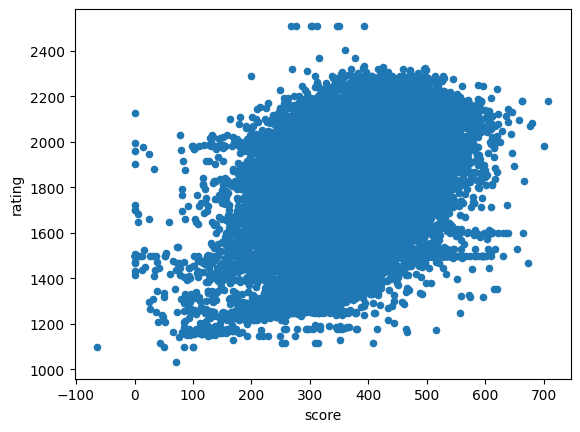

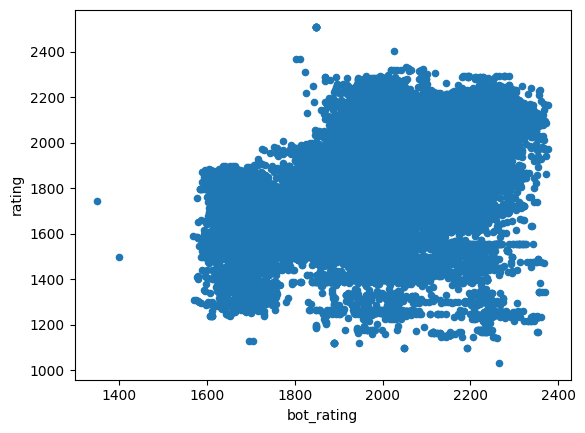

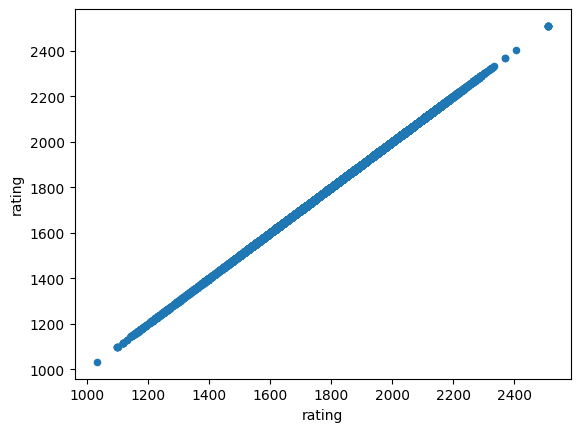

In [20]:
for column in numerical:
    new_games.plot.scatter(x=column, y='rating')

In [21]:
turns_pipe = Pipeline([('is_player_extractor', ColumnsSetterTransformer({'is_player_turn': IsBotExtarctor(names, neg=True)})),
                       ('word_info_mappers', MapSetTransformer({'move_len': (lambda x: len(x) if type(x) == str else np.NAN, 'move'),
                                                                'reused_num': (lambda x: x.count('.') if type(x) == str else np.NAN, 'move'),
                                                                'jokers_num': (lambda x: sum(1 for c in x if c.islower()) if (type(x) == str) and (x not in ['(challenge)', '(time)']) else np.NAN, 'move')
                                                                })),
                       ('to_series', SeriesFromGroupTransformer('game_id', 'turn_number'))
                       ])

new_turns = turns_pipe.transform(turns)

more_games_pipe = Pipeline([('assign_turns', ColumnsSetterTransformer({'turns': new_turns}))])

new_games = more_games_pipe.transform(new_games)
new_games.head()

KeyboardInterrupt: 

In [ ]:
moments_pipe = Pipeline([('points_moments', MapSetTransformer({'p_points_1_moment': (lambda turns: (turns[turns['is_player_turn']]['points']).mean(), 'turns'),
                                                            'p_points_std': (lambda turns: turns[turns['is_player_turn']]['points'].std(), 'turns'),
                                                            'b_points_1_moment': (lambda turns: (turns[~turns['is_player_turn']]['points']).mean(), 'turns'),
                                                            'b_points_std': (lambda turns: turns[~turns['is_player_turn']]['points'].std(), 'turns'),
                                                            'a_points_1_moment': (lambda turns: (turns['points']).mean(), 'turns'),
                                                            'a_points_std': (lambda turns: turns['points'].std(), 'turns'),
                                                            },
))])
res = moments_pipe.transform(new_games)

res[['p_points_1_moment', 'p_points_std', 
     'b_points_1_moment', 'b_points_std',
     'a_points_1_moment', 'a_points_std', 'rating']].corr()['rating']

p_points_1_moment    0.399423
p_points_std         0.237703
b_points_1_moment    0.265389
b_points_std         0.069554
a_points_1_moment    0.413806
a_points_std         0.191779
rating               1.000000
Name: rating, dtype: float64

In [ ]:
word_pipe = Pipeline([('worder', MapSetTransformer({'p_len_avg': (lambda turns: (turns[turns['is_player_turn']]['move_len']).mean(), 'turns'),
                                                    'p_len_std': (lambda turns: (turns[turns['is_player_turn']]['move_len']).std(), 'turns'),
                                                    'p_len_max': (lambda turns: (turns[turns['is_player_turn']]['move_len']).max(), 'turns'),
                                                    'p_len_sum': (lambda turns: (turns[turns['is_player_turn']]['move_len']).sum(), 'turns'),
                                                    'p_len_median': (lambda turns: (turns[turns['is_player_turn']]['move_len']).median(), 'turns'),
                                                    'p_turns_num': (lambda turns: (turns[turns['is_player_turn']]).shape[0], 'turns'),
                                                    'p_points_median': (lambda turns: (turns[turns['is_player_turn']])['points'].median(), 'turns'),
                                                    'b_points_median': (lambda turns: (turns[~turns['is_player_turn']])['points'].median(), 'turns'),
                                                    'a_points_median': (lambda turns: (turns)['points'].median(), 'turns'),
                                                    'p_reused_avg': (lambda turns: (turns[turns['is_player_turn']]['reused_num']).mean(), 'turns'),
                                                    'p_reused_std': (lambda turns: (turns[turns['is_player_turn']]['reused_num']).std(), 'turns'),
                                                    'p_reused_max': (lambda turns: (turns[turns['is_player_turn']]['reused_num']).max(), 'turns'),
                                                    'p_reused_sum': (lambda turns: (turns[turns['is_player_turn']]['reused_num']).sum(), 'turns'),
                                                    'p_reused_median': (lambda turns: (turns[turns['is_player_turn']]['reused_num']).median(), 'turns'),


                                                  })
                     )])
res = word_pipe.transform(new_games)

res[['p_len_avg', 'p_len_std', 'p_len_max', 'p_len_sum', 'p_len_median',
     'p_turns_num', 'p_points_median', 'b_points_median', 'a_points_median',
     'p_reused_avg', 'p_reused_std', 'p_reused_max', 'p_reused_sum', 'p_reused_median',
       'rating']].corr()['rating']

p_len_avg          0.234471
p_len_std          0.226608
p_len_max          0.173144
p_len_sum         -0.061038
p_len_median       0.142012
p_turns_num       -0.254070
p_points_median    0.369247
b_points_median    0.270809
a_points_median    0.405427
p_reused_avg      -0.246873
p_reused_std      -0.135426
p_reused_max      -0.158944
p_reused_sum      -0.312569
p_reused_median   -0.197085
rating             1.000000
Name: rating, dtype: float64

In [ ]:
def count(phrase):
    def f(str):
        return str.count(phrase) if type(str)!=float else np.nan
    return f


dict = {f'{char}_count':(lambda turns, char=char: (turns[turns['is_player_turn']]['move']).map(count(char)).sum(), 'turns') for char in string.ascii_uppercase}
char_pipe = Pipeline([('worder', MapSetTransformer(dict,



                                                  )
                     )])
res = char_pipe.transform(new_games)
res.head()

,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,...,Q_count,R_count,S_count,T_count,U_count,V_count,W_count,X_count,Y_count,Z_count
game_id,,,,,,,,,,,,,,,,,,,,,
1,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,...,0.0,4.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0
3,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262,...,1.0,4.0,2.0,4.0,2.0,1.0,0.0,1.0,1.0,1.0
4,regular,RESIGNED,0,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141,...,0.0,1.0,1.0,1.0,1.0,3.0,2.0,0.0,1.0,0.0
5,regular,STANDARD,0,2022-09-06 04:31:36,NWL20,1200,0,CASUAL,1,642.688722,...,1.0,0.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0
6,regular,STANDARD,0,2022-08-21 14:56:35,CSW21,900,0,RATED,1,426.950541,...,1.0,4.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
arr = [f'{char}_count' for char in string.ascii_uppercase]
arr.append('rating')
res[arr].corr()['rating']

A_count    0.034813
B_count    0.017994
C_count    0.026802
D_count    0.022996
E_count    0.038028
F_count    0.016120
G_count    0.018428
H_count    0.022569
I_count    0.034805
J_count    0.003126
K_count    0.010445
L_count    0.026647
M_count    0.013136
N_count    0.031560
O_count    0.030864
P_count    0.021939
Q_count    0.009758
R_count    0.035285
S_count    0.028729
T_count    0.023182
U_count    0.017933
V_count    0.012768
W_count    0.004902
X_count    0.013039
Y_count    0.018240
Z_count    0.014118
rating     1.000000
Name: rating, dtype: float64

In [ ]:
types = turns['turn_type'].value_counts().index
def count(phrase):
    def f(str):
        return str.count(phrase) if type(str)!=float else np.nan
    return f


dict = {f'{type}_count':(lambda turns, type=type: (turns[turns['is_player_turn']]['turn_type'] == type).sum(), 'turns') for type in types if type!='Challenge_count'}
dict['Challenge_count'] = (lambda turns: (turns[~turns['is_player_turn']]['turn_type'] == 'Challenge').sum(), 'turns')
type_pipe = Pipeline([('worder', MapSetTransformer(dict,



                                                  )
                     )])

res = type_pipe.transform(new_games)

arr = [f'{type}_count' for type in types] 
arr.append('rating')
res[arr].corr()['rating']

Play_count            -0.265674
End_count              0.046321
Exchange_count        -0.079561
Pass_count            -0.038593
Timeout_count         -0.025199
Challenge_count       -0.043739
Six-Zero Rule_count   -0.030574
rating                 1.000000
Name: rating, dtype: float64